In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

dataset_path = 'movies.csv'

df = pd.read_csv(dataset_path)

df.describe()


,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


# DATA CLEANING AND PRE PROCESSING

In [ ]:
# Number of rows and columns in the original raw dataset

num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9999
Number of columns: 9


In [ ]:
# Dataset cleanning method - 1
# Removing duplicate values

df = df.drop_duplicates()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [ ]:
# Number of rows and columns after dropping duplicate values
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9568
Number of columns: 9


In [ ]:
column_data_types = df.dtypes

# Display the data type of each column
print("Data type of each column:")
print(column_data_types)

Data type of each column:
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object


In [ ]:
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9568
Number of columns: 9


In [ ]:
# DATA CLEANNIG PROCESS - 2
# CONVERTING ALL THE VARIOUS TYPES OF DATA INTO A SINGLE TYPE

df['VOTES'] = df['VOTES'].str.replace(',', '').astype(float)

In [ ]:
column_data_types = df.dtypes

# Display the data type of each column
print("Data type of each column:")
print(column_data_types)

Data type of each column:
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
Gross        object
dtype: object


In [ ]:
df['YEAR'] = df['YEAR'].str.extract(r'(\d{4})').astype(float)

In [ ]:
 # Data cleaning process - 3
# removing null values

# We find the number of columns with the common null values and remove them to not skew the data instead of filling it up all three values
# with some filler.

nan_counts = df.isna().sum()


print("Number of NaN values per column:")
print(nan_counts)

Number of NaN values per column:
MOVIES         0
YEAR         635
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64


In [ ]:
columns_with_missing = ['RATING', 'VOTES', 'RunTime']
# 'YEAR', 'GENRE',

# Filtering the rows with missing values for any of the specified columns
rows_to_drop = df[df[columns_with_missing].isnull().all(axis=1)]


num_rows_missing = len(rows_to_drop)
print(f"Number of rows with missing values for specified columns: {num_rows_missing}")

Number of rows with missing values for specified columns: 1178


In [ ]:
df = df.drop(rows_to_drop.index)

num_rows_missing = len(rows_to_drop)

In [ ]:
nan_counts = df.isna().sum()


print("Number of NaN values per column:")
print(nan_counts)

Number of NaN values per column:
MOVIES         0
YEAR          23
GENRE         13
RATING       222
ONE-LINE       0
STARS          0
VOTES        222
RunTime     1382
Gross       7930
dtype: int64


In [ ]:
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 8390
Number of columns: 9


In [ ]:
 # Data cleaning process - 4
# Filling in the data with other measures

# if we wanted to drop the rows with null values we are losing the majority of the rows so we are filling the
# null values with the median value of the entire column

df = df.dropna(subset=['GENRE'])

df['RATING'].fillna(df['RATING'].median(), inplace=True)
df['VOTES'].fillna(df['VOTES'].mean(), inplace=True)
df['RunTime'].fillna(df['RunTime'].median(), inplace=True)

df.head()

<ipython-input-16-e1358c782600>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RATING'].fillna(df['RATING'].median(), inplace=True)
<ipython-input-16-e1358c782600>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VOTES'].fillna(df['VOTES'].mean(), inplace=True)
<ipython-input-16-e1358c782600>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RunTime'].fillna(df['RunTime'].median(), inplace=True)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021.0,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.0,121.0,NaN
1,Masters of the Universe: Revelation,2021.0,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.0,25.0,NaN
2,The Walking Dead,2010.0,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN
3,Rick and Morty,2013.0,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0,NaN
5,Outer Banks,2020.0,"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...",25858.0,50.0,NaN


In [ ]:
# Data cleaning method - 5
# Setting all the numeric characters to the same precision to avoid inconsistency

desired_precision = 2

pd.set_option('display.float_format', lambda x: f'{x:.{desired_precision}f}')

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021.00,"\nAction, Horror, Thriller",6.10,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.00,121.00,NaN
1,Masters of the Universe: Revelation,2021.00,"\nAnimation, Action, Adventure",5.00,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.00,25.00,NaN
2,The Walking Dead,2010.00,"\nDrama, Horror, Thriller",8.20,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.00,44.00,NaN
3,Rick and Morty,2013.00,"\nAnimation, Adventure, Comedy",9.20,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.00,23.00,NaN
5,Outer Banks,2020.00,"\nAction, Crime, Drama",7.60,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...",25858.00,50.00,NaN


In [ ]:
# Data cleaning method - 6

# Converting all text data into lowercase data.

df['MOVIES'] = df['MOVIES'].str.lower()
df['GENRE'] = df['GENRE'].str.lower()
df['ONE-LINE'] = df['ONE-LINE'].str.lower()
df['STARS'] = df['STARS'].str.lower()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,2021.00,"\naction, horror, thriller",6.10,\na woman with a mysterious illness is forced ...,\n director:\npeter thorwarth\n| \n star...,21062.00,121.00,NaN
1,masters of the universe: revelation,2021.00,"\nanimation, action, adventure",5.00,\nthe war for eternia begins again in what may...,"\n \n stars:\nchris wood, \nsara...",17870.00,25.00,NaN
2,the walking dead,2010.00,"\ndrama, horror, thriller",8.20,\nsheriff deputy rick grimes wakes up from a c...,"\n \n stars:\nandrew lincoln, \n...",885805.00,44.00,NaN
3,rick and morty,2013.00,"\nanimation, adventure, comedy",9.20,\nan animated series that follows the exploits...,"\n \n stars:\njustin roiland, \n...",414849.00,23.00,NaN
5,outer banks,2020.00,"\naction, crime, drama",7.60,\na group of teenagers from the wrong side of ...,"\n \n stars:\nchase stokes, \nma...",25858.00,50.00,NaN


In [ ]:
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 8377
Number of columns: 9


In [ ]:
# Number of rows and columns left after removing outliers using the inter quartile range

num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 8377
Number of columns: 9


In [ ]:
# data cleaning process - 8
# Removing the trailing whitespaces in the text data to avoid and inconsistencies.

df['MOVIES'] = df['MOVIES'].str.strip()
df['GENRE'] = df['GENRE'].str.strip()
df['ONE-LINE'] = df['ONE-LINE'].str.strip()
df['STARS'] = df['STARS'].str.strip()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,2021.00,"action, horror, thriller",6.10,a woman with a mysterious illness is forced in...,director:\npeter thorwarth\n| \n stars:\npe...,21062.00,121.00,NaN
1,masters of the universe: revelation,2021.00,"animation, action, adventure",5.00,the war for eternia begins again in what may b...,"stars:\nchris wood, \nsarah michelle gellar, \...",17870.00,25.00,NaN
2,the walking dead,2010.00,"drama, horror, thriller",8.20,sheriff deputy rick grimes wakes up from a com...,"stars:\nandrew lincoln, \nnorman reedus, \nmel...",885805.00,44.00,NaN
3,rick and morty,2013.00,"animation, adventure, comedy",9.20,an animated series that follows the exploits o...,"stars:\njustin roiland, \nchris parnell, \nspe...",414849.00,23.00,NaN
5,outer banks,2020.00,"action, crime, drama",7.60,a group of teenagers from the wrong side of th...,"stars:\nchase stokes, \nmadelyn cline, \nmadis...",25858.00,50.00,NaN


In [ ]:
# Data cleaning and pre processing - 9
# removing the punctuation and special charaters

import re

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['MOVIES'] = df['MOVIES'].apply(remove_special_characters)
df['GENRE'] = df['GENRE'].apply(remove_special_characters)
df['ONE-LINE'] = df['ONE-LINE'].apply(remove_special_characters)
df['STARS'] = df['STARS'].apply(remove_special_characters)

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,2021.00,action horror thriller,6.10,a woman with a mysterious illness is forced in...,director\npeter thorwarth\n \n stars\nperi ...,21062.00,121.00,NaN
1,masters of the universe revelation,2021.00,animation action adventure,5.00,the war for eternia begins again in what may b...,stars\nchris wood \nsarah michelle gellar \nle...,17870.00,25.00,NaN
2,the walking dead,2010.00,drama horror thriller,8.20,sheriff deputy rick grimes wakes up from a com...,stars\nandrew lincoln \nnorman reedus \nmeliss...,885805.00,44.00,NaN
3,rick and morty,2013.00,animation adventure comedy,9.20,an animated series that follows the exploits o...,stars\njustin roiland \nchris parnell \nspence...,414849.00,23.00,NaN
5,outer banks,2020.00,action crime drama,7.60,a group of teenagers from the wrong side of th...,stars\nchase stokes \nmadelyn cline \nmadison ...,25858.00,50.00,NaN


In [ ]:
# Data cleaning process - 10
# Removing numbers from our text data columns

df['MOVIES'] = df['MOVIES'].apply(lambda x: re.sub(r'\d+', '', x))
df['GENRE'] = df['GENRE'].apply(lambda x: re.sub(r'\d+', '', x))
df['ONE-LINE'] = df['ONE-LINE'].apply(lambda x: re.sub(r'\d+', '', x))
df['STARS'] = df['STARS'].apply(lambda x: re.sub(r'\d+', '', x))

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,2021.00,action horror thriller,6.10,a woman with a mysterious illness is forced in...,director\npeter thorwarth\n \n stars\nperi ...,21062.00,121.00,NaN
1,masters of the universe revelation,2021.00,animation action adventure,5.00,the war for eternia begins again in what may b...,stars\nchris wood \nsarah michelle gellar \nle...,17870.00,25.00,NaN
2,the walking dead,2010.00,drama horror thriller,8.20,sheriff deputy rick grimes wakes up from a com...,stars\nandrew lincoln \nnorman reedus \nmeliss...,885805.00,44.00,NaN
3,rick and morty,2013.00,animation adventure comedy,9.20,an animated series that follows the exploits o...,stars\njustin roiland \nchris parnell \nspence...,414849.00,23.00,NaN
5,outer banks,2020.00,action crime drama,7.60,a group of teenagers from the wrong side of th...,stars\nchase stokes \nmadelyn cline \nmadison ...,25858.00,50.00,NaN


In [ ]:
# DATA CLEANING METHOD - 11
# Removing the extra white spaces for consistency

df['MOVIES'] = df['MOVIES'].apply(lambda x: ' '.join(x.split()))
df['GENRE'] = df['GENRE'].apply(lambda x: ' '.join(x.split()))
df['ONE-LINE'] = df['ONE-LINE'].apply(lambda x: ' '.join(x.split()))
df['STARS'] = df['STARS'].apply(lambda x: ' '.join(x.split()))
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,2021.00,action horror thriller,6.10,a woman with a mysterious illness is forced in...,director peter thorwarth stars peri baumeister...,21062.00,121.00,NaN
1,masters of the universe revelation,2021.00,animation action adventure,5.00,the war for eternia begins again in what may b...,stars chris wood sarah michelle gellar lena he...,17870.00,25.00,NaN
2,the walking dead,2010.00,drama horror thriller,8.20,sheriff deputy rick grimes wakes up from a com...,stars andrew lincoln norman reedus melissa mcb...,885805.00,44.00,NaN
3,rick and morty,2013.00,animation adventure comedy,9.20,an animated series that follows the exploits o...,stars justin roiland chris parnell spencer gra...,414849.00,23.00,NaN
5,outer banks,2020.00,action crime drama,7.60,a group of teenagers from the wrong side of th...,stars chase stokes madelyn cline madison baile...,25858.00,50.00,NaN


In [ ]:
# DATA CLEANING METHODS - 12
# REMOVING EMOTICONS AND EMOJIS TO AVOID DATA INTERRUPTION

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



df['MOVIES'] = df['MOVIES'].apply(remove_emojis)
df['GENRE'] = df['GENRE'].apply(remove_emojis)
df['ONE-LINE'] = df['ONE-LINE'].apply(remove_emojis)
df['STARS'] = df['STARS'].apply(remove_emojis)

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,2021.00,action horror thriller,6.10,a woman with a mysterious illness is forced in...,director peter thorwarth stars peri baumeister...,21062.00,121.00,NaN
1,masters of the universe revelation,2021.00,animation action adventure,5.00,the war for eternia begins again in what may b...,stars chris wood sarah michelle gellar lena he...,17870.00,25.00,NaN
2,the walking dead,2010.00,drama horror thriller,8.20,sheriff deputy rick grimes wakes up from a com...,stars andrew lincoln norman reedus melissa mcb...,885805.00,44.00,NaN
3,rick and morty,2013.00,animation adventure comedy,9.20,an animated series that follows the exploits o...,stars justin roiland chris parnell spencer gra...,414849.00,23.00,NaN
5,outer banks,2020.00,action crime drama,7.60,a group of teenagers from the wrong side of th...,stars chase stokes madelyn cline madison baile...,25858.00,50.00,NaN


In [ ]:
# Data cleaning method - 13
# expanding the contractions to avoid data inconsistencies


!pip install contractions
import contractions

df['MOVIES'] = df['MOVIES'].apply(contractions.fix)
df['GENRE'] = df['GENRE'].apply(contractions.fix)
df['ONE-LINE'] = df['ONE-LINE'].apply(contractions.fix)
df['STARS'] = df['STARS'].apply(contractions.fix)


df.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.4 MB/s eta 0:00:00


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,2021.00,action horror thriller,6.10,a woman with a mysterious illness is forced in...,director peter thorwarth stars peri baumeister...,21062.00,121.00,NaN
1,masters of the universe revelation,2021.00,animation action adventure,5.00,the war for eternia begins again in what may b...,stars chris wood sarah michelle gellar lena he...,17870.00,25.00,NaN
2,the walking dead,2010.00,drama horror thriller,8.20,sheriff deputy rick grimes wakes up from a com...,stars andrew lincoln norman reedus melissa mcb...,885805.00,44.00,NaN
3,rick and morty,2013.00,animation adventure comedy,9.20,an animated series that follows the exploits o...,stars justin roiland chris parnell spencer gra...,414849.00,23.00,NaN
5,outer banks,2020.00,action crime drama,7.60,a group of teenagers from the wrong side of th...,stars chase stokes madelyn cline madison baile...,25858.00,50.00,NaN


In [ ]:
# Data cleaning process - 14
# Breaking the words into individual values else called tokenization but manually

df['GENRE'] = df['GENRE'].str.split()

print(df['GENRE'])

0           [action, horror, thriller]
1       [animation, action, adventure]
2            [drama, horror, thriller]
3       [animation, adventure, comedy]
5               [action, crime, drama]
                     ...              
9961                   [comedy, drama]
9962                   [comedy, drama]
9963    [animation, action, adventure]
9976                        [talkshow]
9979                          [comedy]
Name: GENRE, Length: 8377, dtype: object


In [ ]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,2021.00,"[action, horror, thriller]",6.10,a woman with a mysterious illness is forced in...,director peter thorwarth stars peri baumeister...,21062.00,121.00,NaN
1,masters of the universe revelation,2021.00,"[animation, action, adventure]",5.00,the war for eternia begins again in what may b...,stars chris wood sarah michelle gellar lena he...,17870.00,25.00,NaN
2,the walking dead,2010.00,"[drama, horror, thriller]",8.20,sheriff deputy rick grimes wakes up from a com...,stars andrew lincoln norman reedus melissa mcb...,885805.00,44.00,NaN
3,rick and morty,2013.00,"[animation, adventure, comedy]",9.20,an animated series that follows the exploits o...,stars justin roiland chris parnell spencer gra...,414849.00,23.00,NaN
5,outer banks,2020.00,"[action, crime, drama]",7.60,a group of teenagers from the wrong side of th...,stars chase stokes madelyn cline madison baile...,25858.00,50.00,NaN


### Splitting of the data into test, train and split and also using the RANDOM Forest Classifier on the data

Random Forest Classifier Evaluation:
Accuracy: 0.6545346062052506
[[573 152   9]
 [208 366  38]
 [ 42 130 158]]
Classification Report:
              precision    recall  f1-score   support

        Flop       0.56      0.60      0.58       612
     Average       0.70      0.78      0.74       734
         Hit       0.77      0.48      0.59       330

    accuracy                           0.65      1676
   macro avg       0.68      0.62      0.64      1676
weighted avg       0.66      0.65      0.65      1676



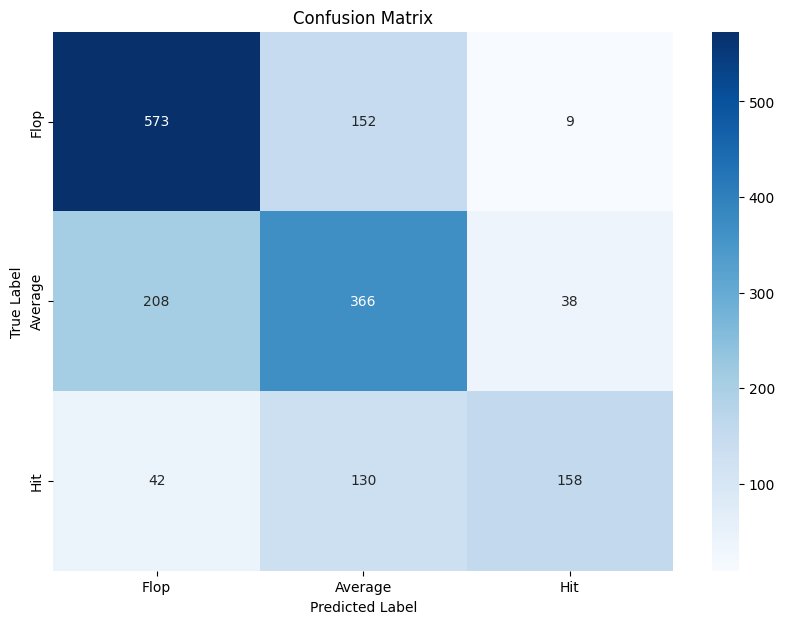

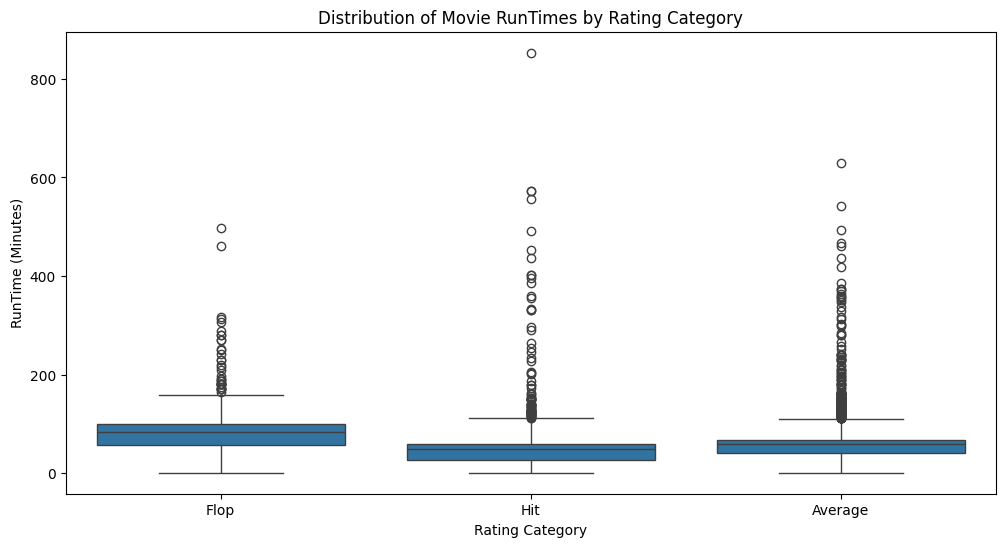

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


#converting the genre from list to a string joined by a ','
df['GENRE'] = df['GENRE'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)



# Function to map ratings to classes based on new criteria for which we base our classification upon.
def map_ratings_to_classes(rating):
    if rating <= 6:
        return 'Flop'
    elif rating <= 7.5:
      return 'Average'
    else:
        return 'Hit'

df2 = df.copy()

df['RATING'] =  np.floor(df['RATING']).astype(int)

df['RATING'] = df['RATING'].apply(map_ratings_to_classes)


X = df.drop('RATING', axis=1)
y = df['RATING']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['VOTES', 'RunTime', 'YEAR']
categorical_features = ['GENRE','ONE-LINE','STARS']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

rf_classifier_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])


rf_classifier_pipeline.fit(X_train, y_train)


y_pred = rf_classifier_pipeline.predict(X_test)


print('Random Forest Classifier Evaluation:')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred, labels=['Flop','Average', 'Hit']))

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Flop','Average', 'Hit']))


conf_matrix = confusion_matrix(y_test, y_pred, labels=['Flop','Average', 'Hit'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop','Average', 'Hit'], yticklabels=['Flop','Average', 'Hit'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

df_vis = df.dropna(subset=['RunTime', 'RATING'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='RATING', y='RunTime', data=df_vis)
plt.title('Distribution of Movie RunTimes by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('RunTime (Minutes)')
plt.show()



In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'random_forest_classifier.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(rf_classifier_pipeline, file)

## Decision Tree Classifier on the data.

Accuracy: 0.6264916467780429
[[366 208  38]
 [152 573   9]
 [130  42 158]]
Decision Tree Classifier Metrics:
              precision    recall  f1-score   support

     Average       0.57      0.55      0.56       612
        Flop       0.68      0.72      0.70       734
         Hit       0.60      0.55      0.57       330

    accuracy                           0.63      1676
   macro avg       0.62      0.61      0.61      1676
weighted avg       0.62      0.63      0.62      1676

Accuracy: 0.6264916467780429
[[532 158  44]
 [197 338  77]
 [ 48 102 180]]


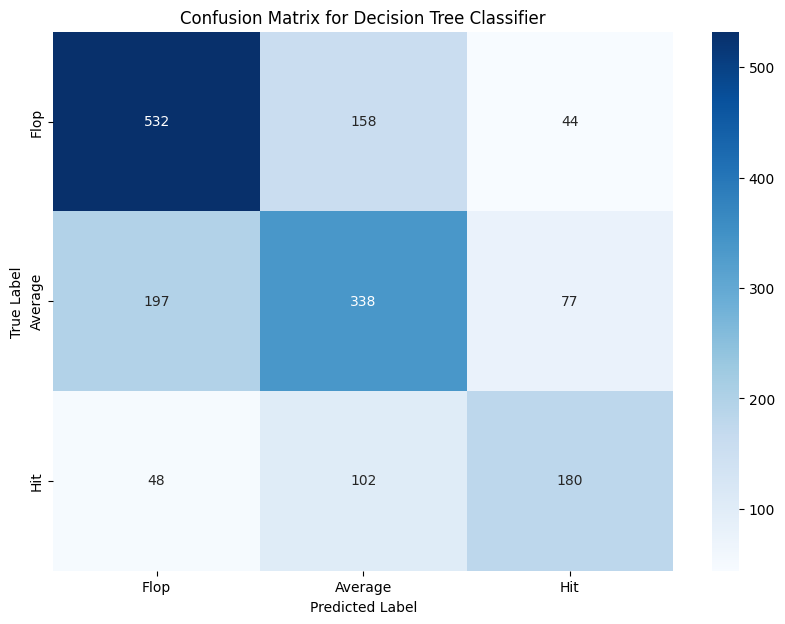

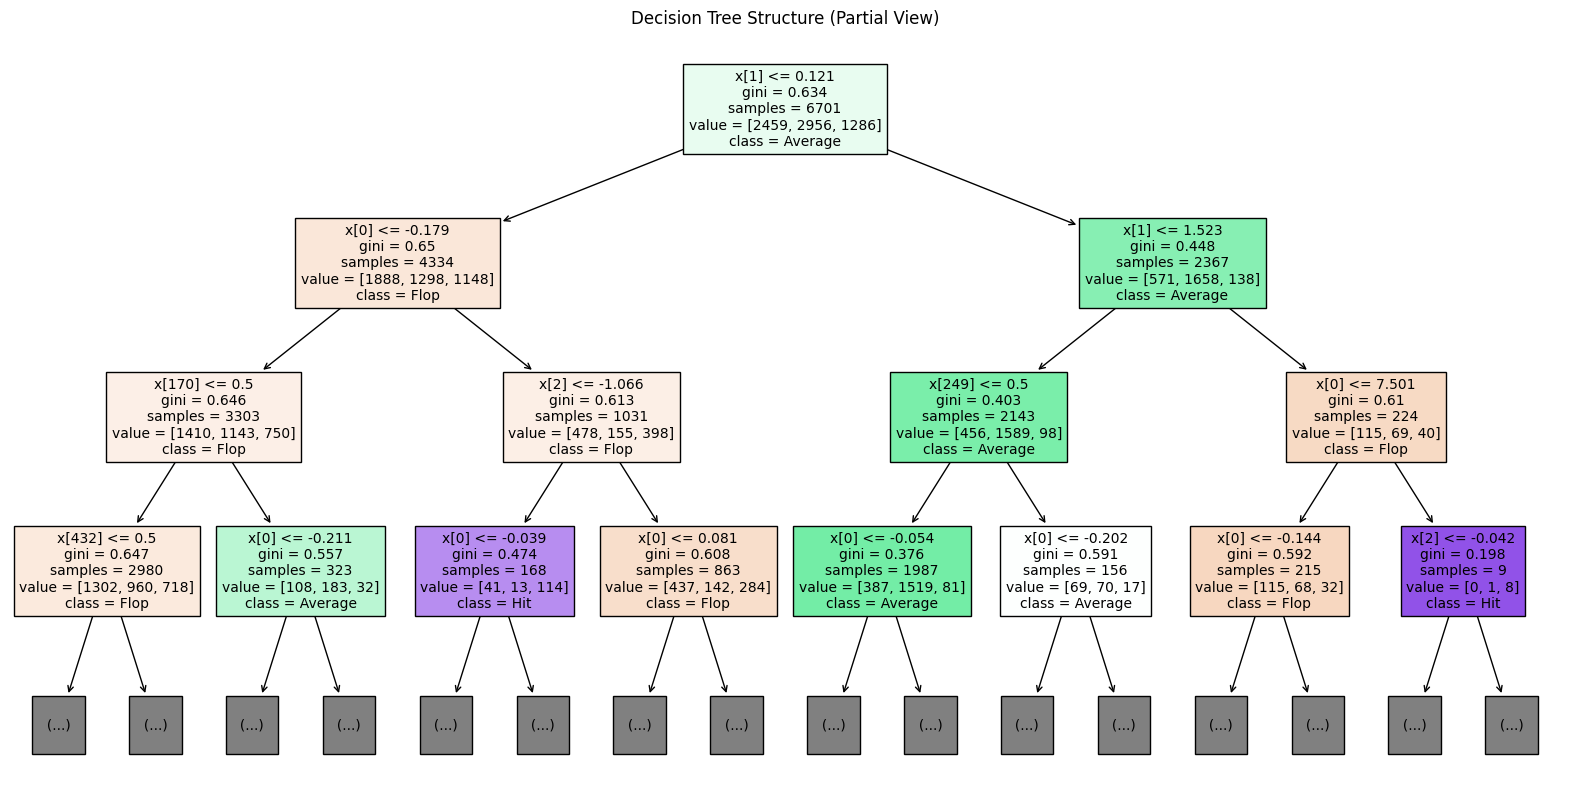

In [ ]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)


print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print(confusion_matrix(y_test, y_pred))

print('Decision Tree Classifier Metrics:')
print(classification_report(y_test, y_pred_dt))

print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')


conf_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_dt)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(dt_pipeline.named_steps['classifier'], max_depth=3, filled=True, class_names=['Flop', 'Average', 'Hit'], fontsize=10)
plt.title('Decision Tree Structure (Partial View)')
plt.show()

In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'decision_tree_classifier.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(dt_pipeline, file)

## Gradient Boosting Classifier model on the data .

Gradient Boosting Classifier Metrics:
              precision    recall  f1-score   support

     Average       0.51      0.65      0.57       612
        Flop       0.70      0.70      0.70       734
         Hit       0.69      0.36      0.48       330

    accuracy                           0.61      1676
   macro avg       0.63      0.57      0.58      1676
weighted avg       0.63      0.61      0.61      1676

Accuracy: 0.6133651551312649
[[512 209  13]
 [174 396  42]
 [ 45 165 120]]


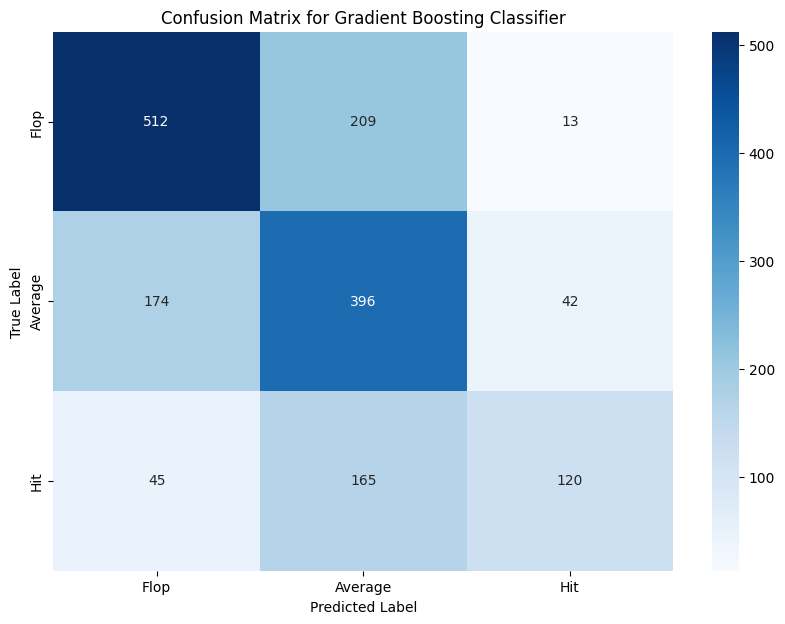

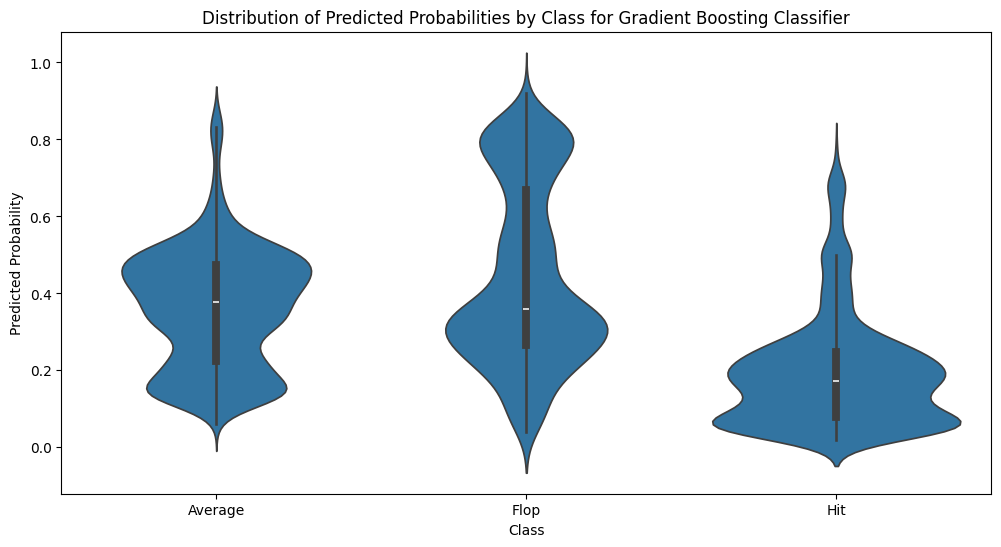

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)


print('Gradient Boosting Classifier Metrics:')
print(classification_report(y_test, y_pred_gb))

print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')


conf_matrix_gb = confusion_matrix(y_test, y_pred_gb, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_gb)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_pred_prob_gb = gb_pipeline.predict_proba(X_test)


prob_df = pd.DataFrame(y_pred_prob_gb, columns=gb_pipeline.named_steps['classifier'].classes_)


prob_df_melted = prob_df.melt(var_name='Class', value_name='Probability')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Class', y='Probability', data=prob_df_melted)
plt.title('Distribution of Predicted Probabilities by Class for Gradient Boosting Classifier')
plt.xlabel('Class')
plt.ylabel('Predicted Probability')
plt.show()

In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'gradient_booster_classifier.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(gb_pipeline, file)

## Performing the basic logistic regression on the data.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Evaluation:
              precision    recall  f1-score   support

        Flop       0.55      0.51      0.53       612
     Average       0.64      0.79      0.71       734
         Hit       0.69      0.42      0.53       330

    accuracy                           0.62      1676
   macro avg       0.63      0.58      0.59      1676
weighted avg       0.62      0.62      0.61      1676

Accuracy: 0.6163484486873508
[[582 142  10]
 [249 311  52]
 [ 78 112 140]]


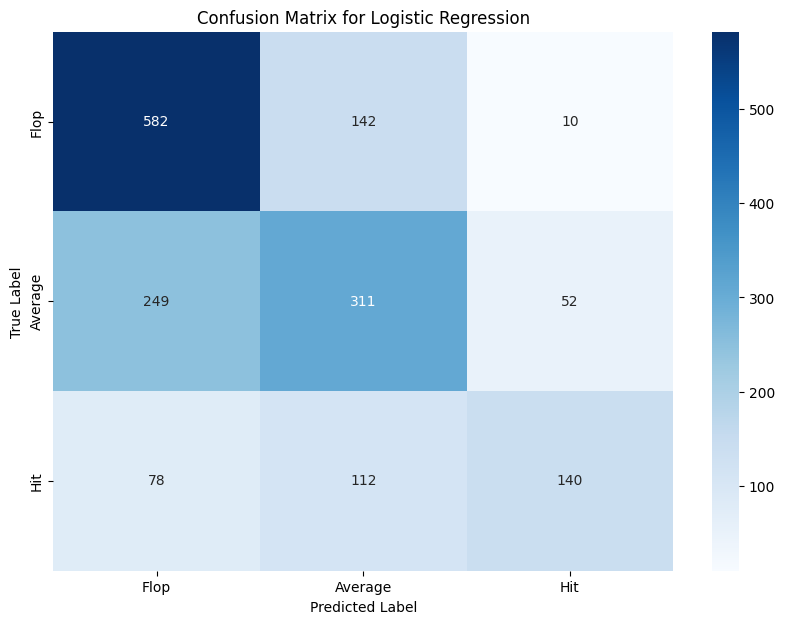

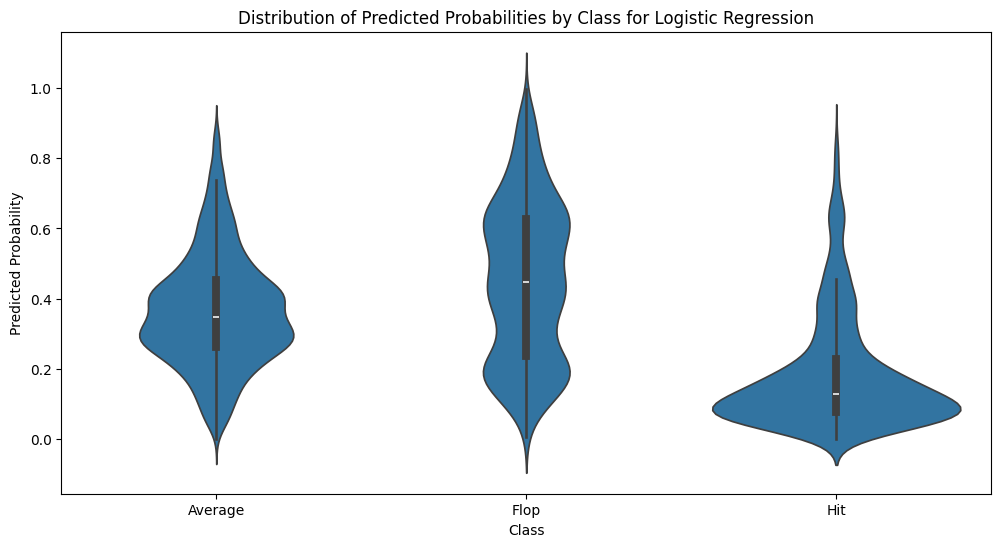

In [ ]:
from sklearn.linear_model import LogisticRegression



logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


logistic_regression_pipeline.fit(X_train, y_train)


y_pred_logistic = logistic_regression_pipeline.predict(X_test)

print('Logistic Regression Evaluation:')
print(classification_report(y_test, y_pred_logistic, target_names=['Flop', 'Average', 'Hit']))
print(f'Accuracy: {accuracy_score(y_test, y_pred_logistic)}')
conf_matrix_lr = confusion_matrix(y_test, y_pred_logistic, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_lr)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred_prob_lr = logistic_regression_pipeline.predict_proba(X_test)
prob_df_lr = pd.DataFrame(y_pred_prob_lr, columns=logistic_regression_pipeline.named_steps['classifier'].classes_)
prob_df_melted_lr = prob_df_lr.melt(var_name='Class', value_name='Probability')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Class', y='Probability', data=prob_df_melted_lr)
plt.title('Distribution of Predicted Probabilities by Class for Logistic Regression')
plt.xlabel('Class')
plt.ylabel('Predicted Probability')
plt.show()


In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'logistic_regression_classifier.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(logistic_regression_pipeline, file)

## KNN Neighbours Classifier

K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

        Flop       0.57      0.60      0.58       612
     Average       0.71      0.73      0.72       734
         Hit       0.66      0.55      0.60       330

    accuracy                           0.64      1676
   macro avg       0.65      0.62      0.63      1676
weighted avg       0.65      0.64      0.64      1676

Accuracy: 0.6449880668257757
[[536 165  33]
 [189 365  58]
 [ 34 116 180]]


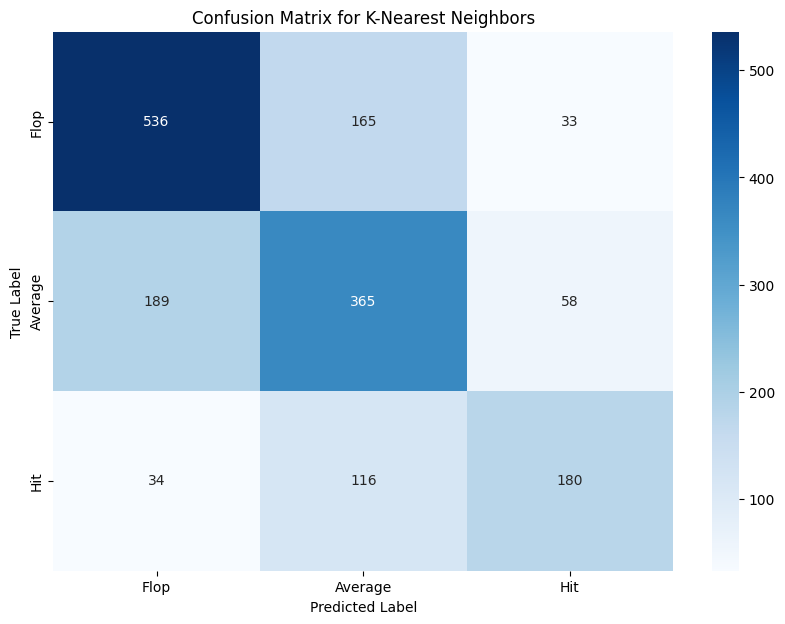

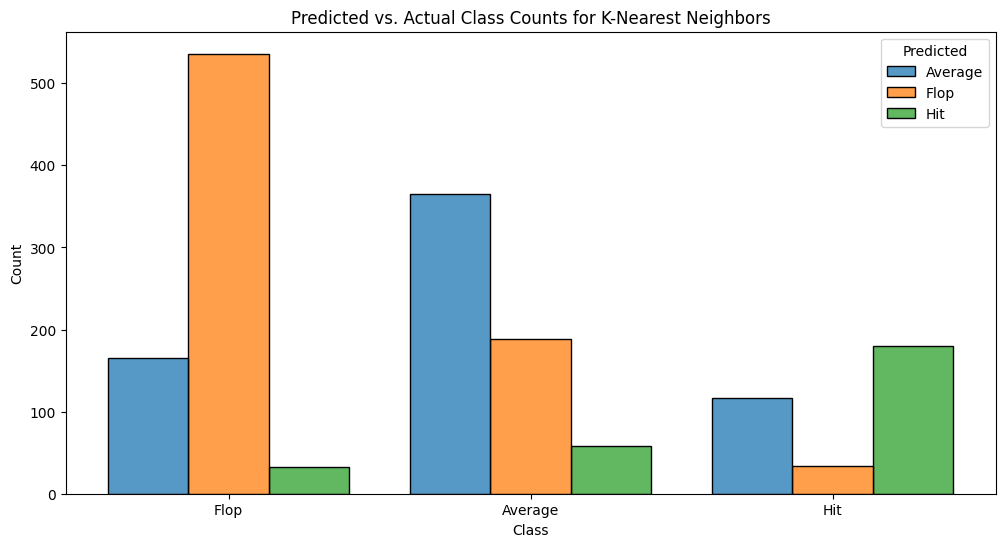

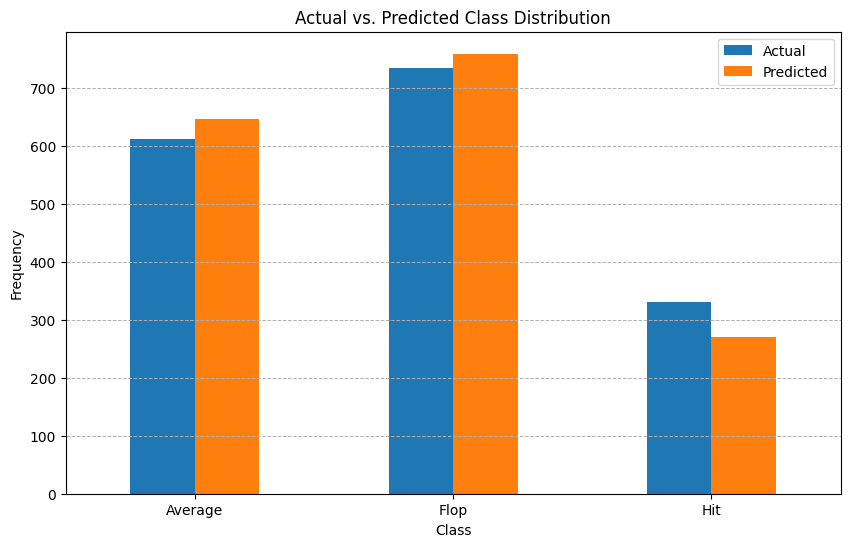

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])


knn_pipeline.fit(X_train, y_train)


y_pred_knn = knn_pipeline.predict(X_test)

print('K-Nearest Neighbors Evaluation:')
print(classification_report(y_test, y_pred_knn, target_names=['Flop', 'Average', 'Hit']))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_knn)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn}), x='Actual', hue='Predicted', multiple="dodge", shrink=.8)
plt.title('Predicted vs. Actual Class Counts for K-Nearest Neighbors')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})


class_distribution_actual = df_comparison['Actual'].value_counts().sort_index()
class_distribution_predicted = df_comparison['Predicted'].value_counts().sort_index()


df_plot = pd.DataFrame({'Actual': class_distribution_actual, 'Predicted': class_distribution_predicted})


df_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Actual vs. Predicted Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(loc='best')
plt.show()

In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'KNN_classifier.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(knn_pipeline, file)

## Single Vector Classifier

Support Vector Machine Evaluation:
              precision    recall  f1-score   support

        Flop       0.53      0.57      0.55       612
     Average       0.66      0.76      0.71       734
         Hit       0.73      0.37      0.49       330

    accuracy                           0.62      1676
   macro avg       0.64      0.57      0.58      1676
weighted avg       0.63      0.62      0.61      1676

Accuracy: 0.6163484486873508
[[561 164   9]
 [225 350  37]
 [ 62 146 122]]


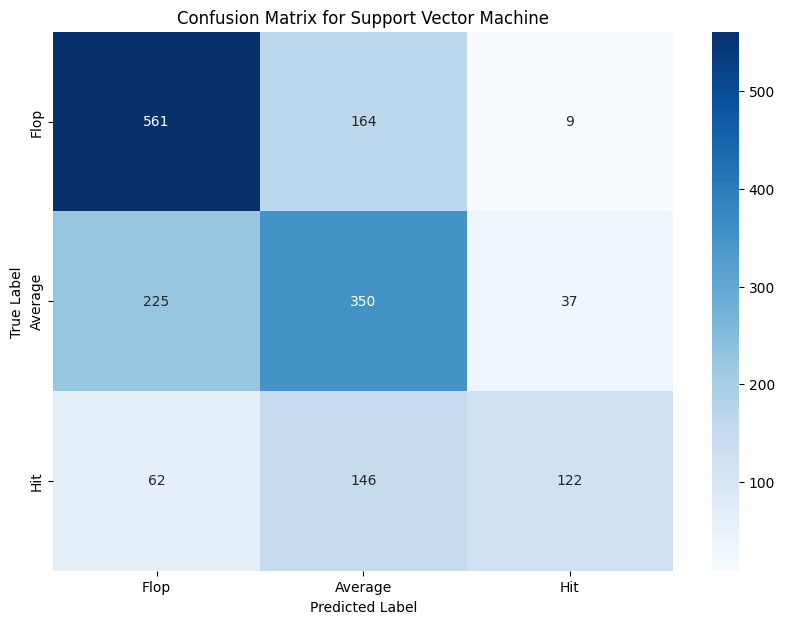

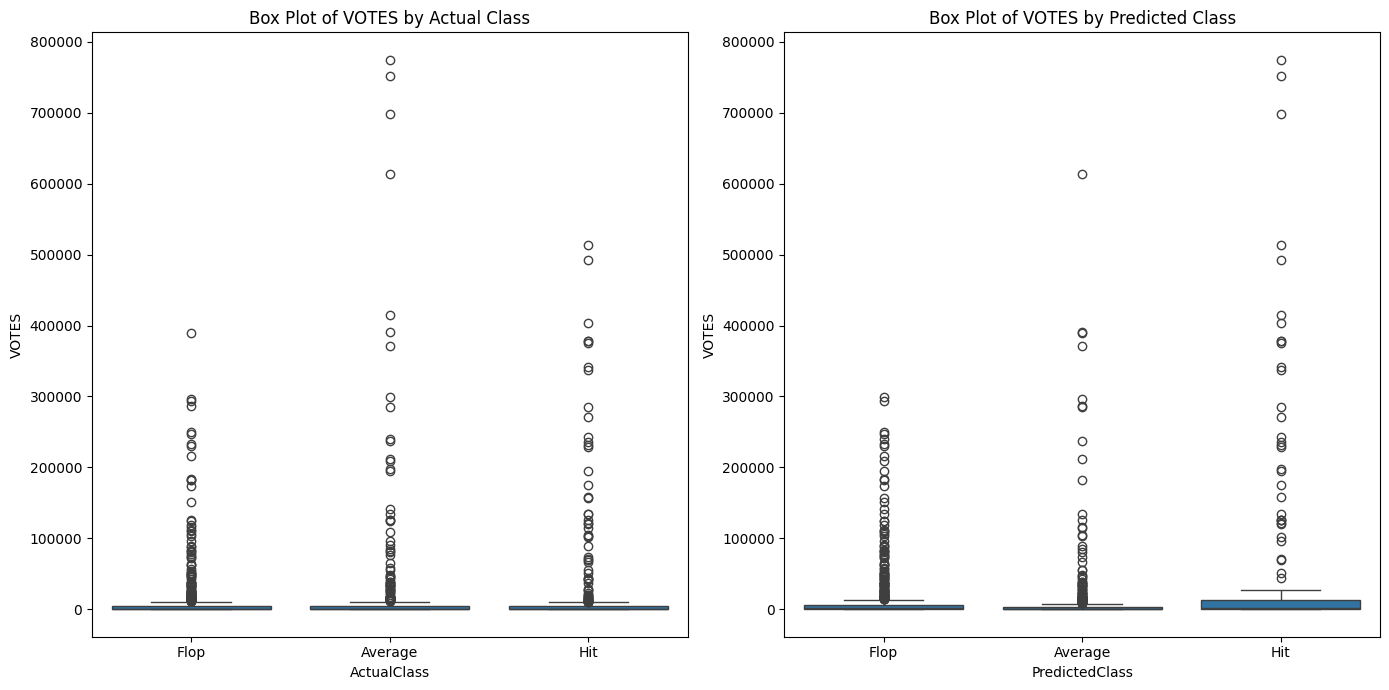

In [ ]:
from sklearn.svm import SVC


svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])


svm_pipeline.fit(X_train, y_train)


y_pred_svm = svm_pipeline.predict(X_test)

print('Support Vector Machine Evaluation:')
print(classification_report(y_test, y_pred_svm, target_names=['Flop', 'Average', 'Hit']))
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_svm)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

X_test_vis = pd.DataFrame(X_test).copy()
X_test_vis['ActualClass'] = y_test
X_test_vis['PredictedClass'] = y_pred_svm


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
sns.boxplot(x='ActualClass', y='VOTES', data=X_test_vis)
plt.title('Box Plot of VOTES by Actual Class')


plt.subplot(1, 2, 2)
sns.boxplot(x='PredictedClass', y='VOTES', data=X_test_vis)
plt.title('Box Plot of VOTES by Predicted Class')

plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'Single_vector_classifier.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(svm_pipeline, file)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns



X = df2.drop('RATING', axis=1)
y = df2['RATING']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ['VOTES', 'RunTime','YEAR']
categorical_features = ['GENRE','ONE-LINE','STARS']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])




## Linear Regression

Mean Squared Error:  5.234819105788758
R2 Score:  -2.8316879900270147
Mean Absolute Error:  1.3960817439330162


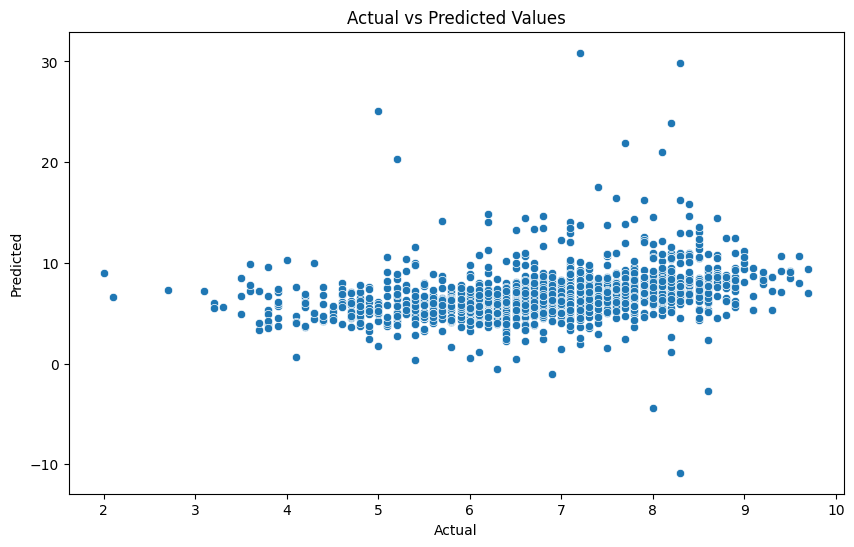

<ipython-input-36-0c7c9681e684>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


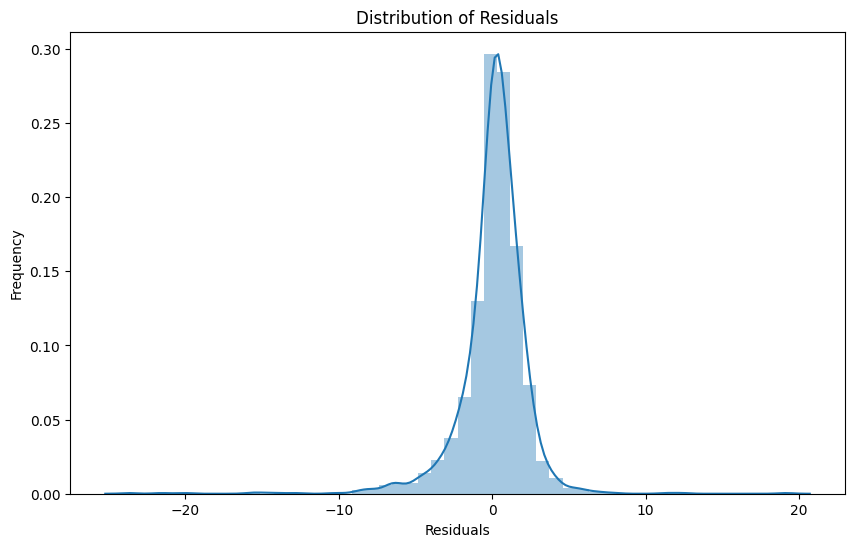

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', LinearRegression())])

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))


plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


plt.figure(figsize=(10,6))
sns.distplot(y_test - y_pred)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'linear_regressor.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(lr, file)

## K Nearest Neighbours Regressor

Mean Squared Error:  0.8580224343675417
R2 Score:  0.37196029308743783
Mean Absolute Error:  0.6728162291169452


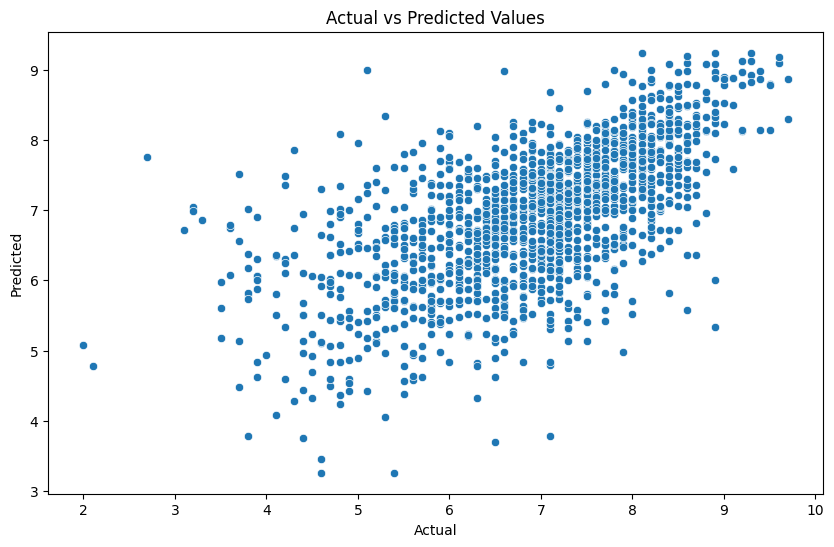

<ipython-input-37-e9ead75c8223>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


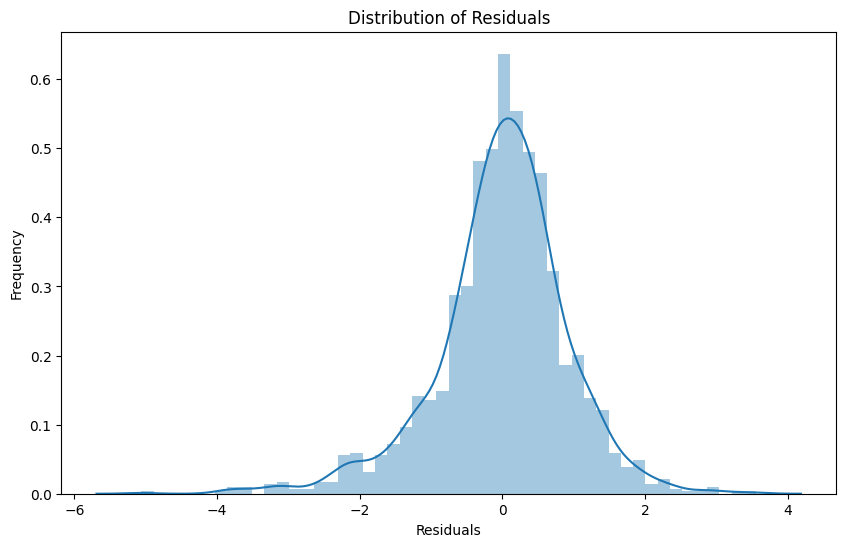

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', KNeighborsRegressor(n_neighbors=5))])

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


# Evaluation Metrics
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

# Visualization - Actual vs. Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Visualization - Residual Distribution
plt.figure(figsize=(10,6))
sns.distplot(y_test - y_pred)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'knn_regressor.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(knn, file)

## Single Vector Regressor

Mean Squared Error:  0.9275683217832454
R2 Score:  0.3210553551743309
Mean Absolute Error:  0.7096451374159224


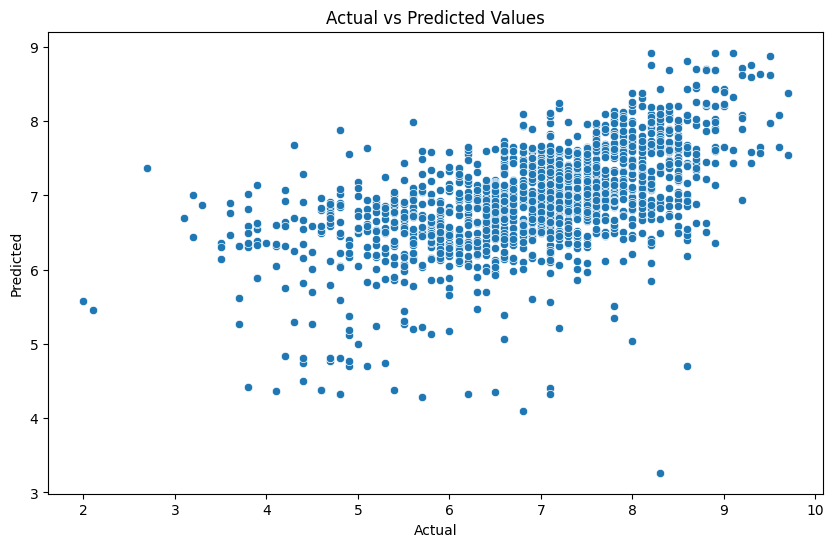

<ipython-input-38-e1ea50fe4324>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


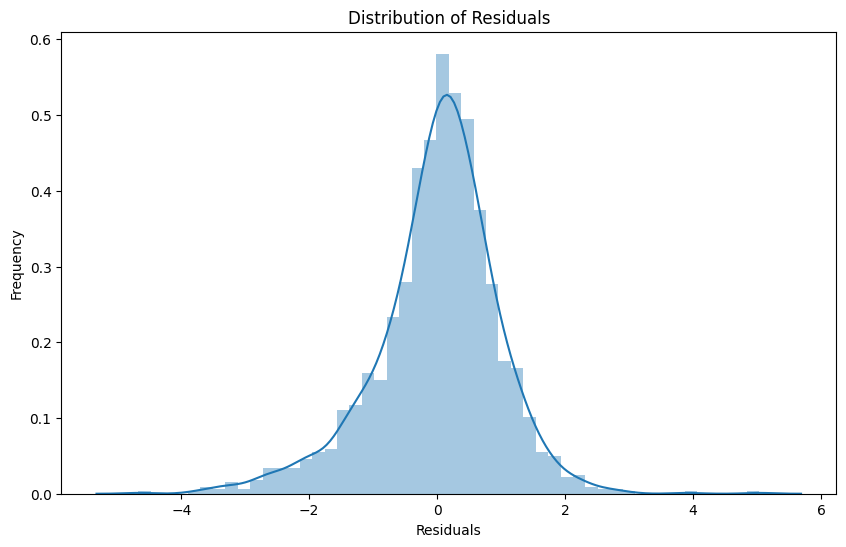

In [ ]:
from sklearn.svm import SVR


svm_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', SVR(kernel='linear'))])

svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)


print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

# Visualization - Actual vs. Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Visualization - Residual Distribution
plt.figure(figsize=(10,6))
sns.distplot(y_test - y_pred)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'svm_regressor.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(svm_reg, file)

## Random Forest Regressor

Random Forest Regressor
Mean Squared Error:  0.7405323123704499
R2 Score:  0.4579585826759438
Mean Absolute Error:  0.615923035288101


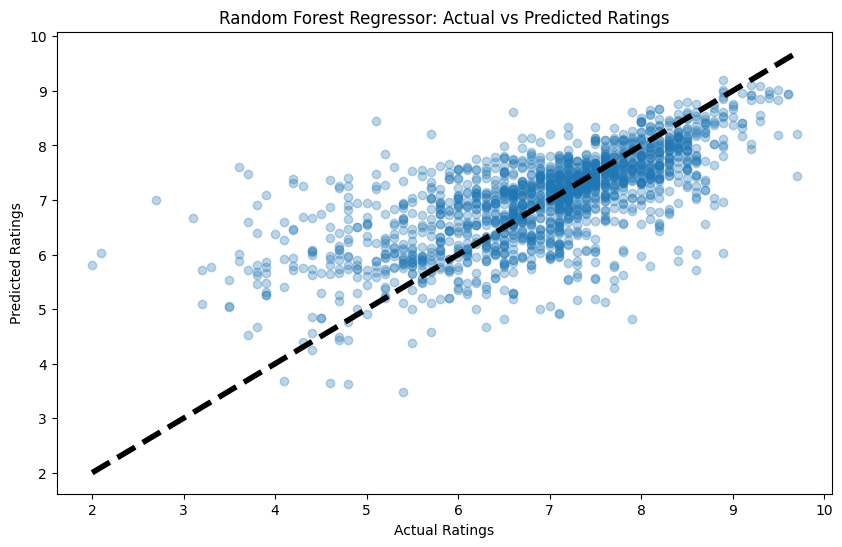

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation Metrics
print("Random Forest Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

# Visualization - Actual vs. Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'random_forest_regressor.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(rf, file)

## Gradient Boosting Regressor

Gradient Boosting Regressor
Mean Squared Error:  0.8808005763500208
R2 Score:  0.3552875616509531
Mean Absolute Error:  0.714392044009223


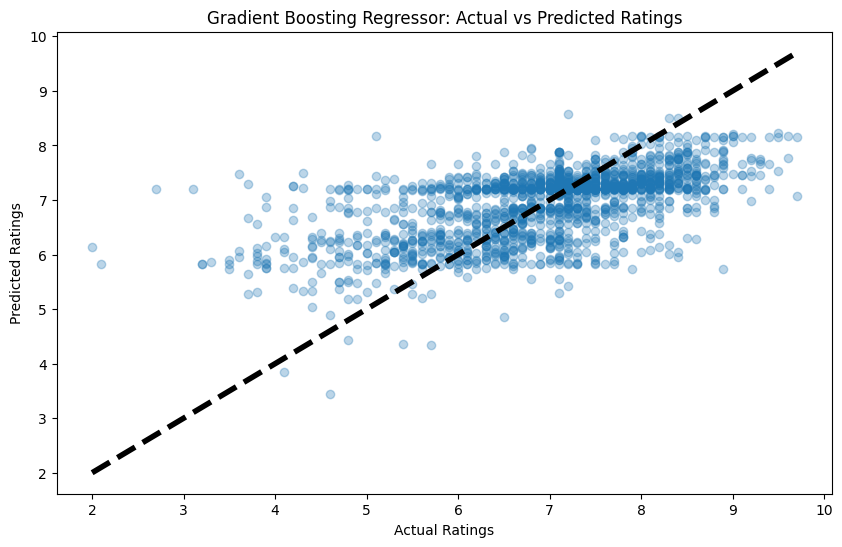

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gb = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                                             max_depth=3, random_state=42))])

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Evaluation Metrics
print("Gradient Boosting Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

# Visualization - Actual vs. Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


In [ ]:
import pickle

# Specify the path and file name to save the model
model_file_path = 'gradient_booster_regressor.pkl'

# Open a file in write-binary mode
with open(model_file_path, 'wb') as file:
    # Dump the rf_classifier_pipeline into the file
    pickle.dump(gb, file)